In [1]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import duckdb
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
con = duckdb.connect()
con.execute("""-- Set memory limits before running query
                SET memory_limit='16GB';
                -- Enable progress tracking
                SET enable_progress_bar=true;
                -- Enable detailed profiling
                SET profiling_mode='detailed';
            """)

Creating views for all parquets

In [3]:
parquet_path = "/Users/couch/intel_research/data/web_cat_usage_v2/webcat_0000_part_00.parquet"
view_name = "webcat_view_V2"

con.execute(f"""
    CREATE VIEW {view_name} AS 
    SELECT * FROM read_parquet('{parquet_path}');
""")

sum_00 = con.execute(f"SELECT guid, SUM(duration_ms) FROM {view_name} GROUP BY guid ORDER BY guid").fetchdf()
sum_00

┌─────────────────────────────────────┐
│┌───────────────────────────────────┐│
││    Query Profiling Information    ││
│└───────────────────────────────────┘│
└─────────────────────────────────────┘
SELECT guid, SUM(duration_ms) FROM webcat_view_V2 GROUP BY guid ORDER BY guid
┌────────────────────────────────────────────────┐
│┌──────────────────────────────────────────────┐│
││              Total Time: 0.0966s             ││
│└───────────��──────────────────────────────────┘│
└────────────────────────────────────────────────┘
┌────────────────────────────────────────────────┐
│               Optimizer: 0.0019s               │
│┌──────────────────────────────────────────────┐│
││        Build Side Probe Side: 0.0000s        ││
││           Column Lifetime: 0.0000s           ││
││           Common Aggregate: 0.0000s          ││
││        Common Subexpressions: 0.0000s        ││
││      Compressed Materialization: 0.0000s     ││
││          Cte Filter Pusher: 0.0000s          ││
││     

,guid,sum(duration_ms)
0,000091c0adc149389235ed2c5f15a59e,32002277.0
1,0000af8fab2d4669bad5917875158ab9,485258236.0
2,0002deb808fe4d6281c1159ebce45fad,6227575.0
3,0002ebb7751c41e982e43afc7d656158,177538620.0
4,00042b155a4b45a19f6c19c2cf74954f,27258387.0
...,...,...
64271,fffd0381b30d4ab6b5af52d0acf3d671,366366853.0
64272,fffd3160ab8245b7af08195a43789194,2066807.0
64273,fffdc52790524a1aa012d1d1ac6f3b3c,452309.0
64274,fffdf54ca6d14064b2dc5514fa8a4483,188720762.0


In [4]:
parquet_path_01 = "/Users/couch/intel_research/data/web_cat_usage_v2/webcat_0000_part_00.parquet"
view_name = "webcat_view_V2_01"

con.execute(f"""
    CREATE VIEW {view_name} AS 
    SELECT * FROM read_parquet('{parquet_path_01}');
""")

sum_01 = con.execute(f"SELECT guid, SUM(duration_ms) FROM {view_name} GROUP BY guid ORDER BY guid").fetchdf()
sum_01

┌─────────────────────────────────────┐
│┌───────────────────────────────────┐│
││    Query Profiling Information    ││
│└───────────────────────────────────┘│
└─────────────────────────────────────┘
SELECT guid, SUM(duration_ms) FROM webcat_view_V2_01 GROUP BY guid ORDER BY guid
┌────────────────────────────────────────────────┐
│┌──────────────────────────────────────────────┐│
││              Total Time: 0.0383s             ││
│└──────────��───────────────────────────────────┘│
└────────────────────────────────────────────────┘
┌────────────────────────────────────────────────┐
│               Optimizer: 0.0002s               │
│┌──────────────────────────────────────────────┐│
││        Build Side Probe Side: 0.0000s        ││
││           Column Lifetime: 0.0000s           ││
││           Common Aggregate: 0.0000s          ││
││        Common Subexpressions: 0.0000s        ││
││      Compressed Materialization: 0.0000s     ││
││          Cte Filter Pusher: 0.0000s          ││
││  

,guid,sum(duration_ms)
0,000091c0adc149389235ed2c5f15a59e,32002277.0
1,0000af8fab2d4669bad5917875158ab9,485258236.0
2,0002deb808fe4d6281c1159ebce45fad,6227575.0
3,0002ebb7751c41e982e43afc7d656158,177538620.0
4,00042b155a4b45a19f6c19c2cf74954f,27258387.0
...,...,...
64271,fffd0381b30d4ab6b5af52d0acf3d671,366366853.0
64272,fffd3160ab8245b7af08195a43789194,2066807.0
64273,fffdc52790524a1aa012d1d1ac6f3b3c,452309.0
64274,fffdf54ca6d14064b2dc5514fa8a4483,188720762.0


In [5]:
parquet_path_02 = "/Users/couch/intel_research/data/web_cat_usage_v2/webcat_0002_part_00.parquet"
view_name = "webcat_view_V2_02"

con.execute(f"""
    CREATE VIEW {view_name} AS 
    SELECT * FROM read_parquet('{parquet_path_02}');
""")

sum_02 = con.execute(f"SELECT guid, SUM(duration_ms) FROM {view_name} GROUP BY guid ORDER BY guid").fetchdf()
sum_02

┌─────────────────────────────────────┐
│┌───────────────────────────────────┐│
││    Query Profiling Information    ││
│└───────────────────────────────────┘│
└─────────────────────────────────────┘
SELECT guid, SUM(duration_ms) FROM webcat_view_V2_02 GROUP BY guid ORDER BY guid
┌────────────────────────────────────────────────┐
│┌──────────────────────────────────────────────┐│
││              Total Time: 0.103s              ││
│└──────────��───────────────────────────────────┘│
└────────────────────────────────────────────────┘
┌────────────────────────────────────────────────┐
│               Optimizer: 0.0002s               │
│┌──────────────────────────────────────────────┐│
││        Build Side Probe Side: 0.0000s        ││
││           Column Lifetime: 0.0000s           ││
││           Common Aggregate: 0.0000s          ││
││        Common Subexpressions: 0.0000s        ││
││      Compressed Materialization: 0.0000s     ││
││          Cte Filter Pusher: 0.0000s          ││
││  

,guid,sum(duration_ms)
0,0000215f64624fbc99f8c23800d7e60f,1.237086e+08
1,00018fc022644c74a3b38f9d4ae19982,1.315521e+08
2,00025787579448cbadcffeb697ff37bb,1.470789e+09
3,0003039c87b8468399d03b0b5284f948,1.636941e+09
4,0003b447d9a94e1c9fb20e9ed64c0ea3,3.837889e+07
...,...,...
63888,fffb9724bcf447bbb7f3fffdeb3b3c8f,5.677066e+08
63889,fffc1580d20a429c9e8025657df3c6da,4.394158e+09
63890,fffe89c4607c4d0383555ea09d27ec2c,1.702209e+07
63891,fffea86c3c6c489196f38fbc002b6020,9.649003e+08


In [6]:
parquet_path_03 = "/Users/couch/intel_research/data/web_cat_usage_v2/webcat_0003_part_00.parquet"
view_name = "webcat_view_V2_03"

con.execute(f"""
    CREATE VIEW {view_name} AS 
    SELECT * FROM read_parquet('{parquet_path_03}');
""")

sum_03 = con.execute(f"SELECT guid, SUM(duration_ms) FROM {view_name} GROUP BY guid ORDER BY guid").fetchdf()
sum_03

┌─────────────────────────────────────┐
│┌───────────────────────────────────┐│
││    Query Profiling Information    ││
│└───────────────────────────────────┘│
└─────────────────────────────────────┘
SELECT guid, SUM(duration_ms) FROM webcat_view_V2_03 GROUP BY guid ORDER BY guid
┌────────────────────────────────────────────────┐
│┌──────────────────────────────────────────────┐│
││              Total Time: 0.0940s             ││
│└──────────��───────────────────────────────────┘│
└────────────────────────────────────────────────┘
┌────────────────────────────────────────────────┐
│               Optimizer: 0.0001s               │
│┌──────────────────────────────────────────────┐│
││        Build Side Probe Side: 0.0000s        ││
││           Column Lifetime: 0.0000s           ││
││           Common Aggregate: 0.0000s          ││
││        Common Subexpressions: 0.0000s        ││
││      Compressed Materialization: 0.0000s     ││
││          Cte Filter Pusher: 0.0000s          ││
││  

,guid,sum(duration_ms)
0,00010ab0daf7426b813be3de1288b9a0,1.799117e+07
1,0001211c45ad4dcb87ff011669f690be,4.474550e+08
2,0001c374d0a346b3a4a2a65305e902c0,8.860773e+07
3,00022a0f7bdd4adbb1f4440dc14c577c,1.059740e+07
4,0002b3a7a7ae48c58c7d58a185022e9f,4.940082e+07
...,...,...
63648,fffcac4807504e719ea4dbe6f79f9cc7,1.077108e+09
63649,fffd1c357c49416ba84774d0f7608c13,6.887841e+07
63650,fffe6ad935294f219990de1e8c77e389,2.238288e+09
63651,ffffae38f04645a7a8c400dd355e9dd9,1.168417e+06


In [7]:
parquet_path_04 = "/Users/couch/intel_research/data/web_cat_usage_v2/webcat_0004_part_00.parquet"
view_name = "webcat_view_V2_04"

con.execute(f"""
    CREATE VIEW {view_name} AS 
    SELECT * FROM read_parquet('{parquet_path_04}');
""")

sum_04 = con.execute(f"SELECT guid, SUM(duration_ms) FROM {view_name} GROUP BY guid ORDER BY guid").fetchdf()
sum_04

┌─────────────────────────────────────┐
│┌───────────────────────────────────┐│
││    Query Profiling Information    ││
│└───────────────────────────────────┘│
└─────────────────────────────────────┘
SELECT guid, SUM(duration_ms) FROM webcat_view_V2_04 GROUP BY guid ORDER BY guid
┌────────────────────────────────────────────────┐
│┌──────────────────────────────────────────────┐│
││              Total Time: 0.0952s             ││
│└──────────��───────────────────────────────────┘│
└────────────────────────────────────────────────┘
┌────────────────────────────────────────────────┐
│               Optimizer: 0.0001s               │
│┌──────────────────────────────────────────────┐│
││        Build Side Probe Side: 0.0000s        ││
││           Column Lifetime: 0.0000s           ││
││           Common Aggregate: 0.0000s          ││
││        Common Subexpressions: 0.0000s        ││
││      Compressed Materialization: 0.0000s     ││
││          Cte Filter Pusher: 0.0000s          ││
││  

,guid,sum(duration_ms)
0,0000ba15440c49eab545d00889b64f4a,2.803230e+07
1,0002014797694c23a09dd9535307b92f,8.052667e+06
2,00020252e77044649288bbbbd343cd35,8.901770e+08
3,0003bb43443444d29337c5c69d46d9c7,4.066860e+06
4,0003f638b52240b7b2db517a6f0d4206,5.372078e+09
...,...,...
64344,fff9e54f359f489c82901c8f1a1d148a,6.861620e+05
64345,fffa91941a54449bbe91d8cff3b27227,3.895961e+07
64346,fffc34ba12a94952bf773d228c4624e3,3.467506e+07
64347,fffccc41e0d84bcaa5a73f80eeb435d6,3.228486e+08


In [8]:
parquet_path_05 = "/Users/couch/intel_research/data/web_cat_usage_v2/webcat_0005_part_00.parquet"
view_name = "webcat_view_V2_05"

con.execute(f"""
    CREATE VIEW {view_name} AS 
    SELECT * FROM read_parquet('{parquet_path_05}');
""")

sum_05 = con.execute(f"SELECT guid, SUM(duration_ms) FROM {view_name} GROUP BY guid ORDER BY guid").fetchdf()
sum_05 

┌─────────────────────────────────────┐
│┌───────────────────────────────────┐│
││    Query Profiling Information    ││
│└───────────────────────────────────┘│
└─────────────────────────────────────┘
SELECT guid, SUM(duration_ms) FROM webcat_view_V2_05 GROUP BY guid ORDER BY guid
┌────────────────────────────────────────────────┐
│┌──────────────────────────────────────────────┐│
││              Total Time: 0.0799s             ││
│└──────────��───────────────────────────────────┘│
└────────────────────────────────────────────────┘
┌────────────────────────────────────────────────┐
│               Optimizer: 0.0001s               │
│┌──────────────────────────────────────────────┐│
││        Build Side Probe Side: 0.0000s        ││
││           Column Lifetime: 0.0000s           ││
││           Common Aggregate: 0.0000s          ││
││        Common Subexpressions: 0.0000s        ││
││      Compressed Materialization: 0.0000s     ││
││          Cte Filter Pusher: 0.0000s          ││
││  

,guid,sum(duration_ms)
0,0001c8444e8a42d9a38674f737886d0e,4.777803e+07
1,0002dbfbb64b410f97183ab16f04f38d,6.238950e+05
2,000313c534c945dbbd08c8506ff1d417,5.011949e+08
3,0003d0dcf96349ac9f2187aa8070ad83,1.073392e+07
4,000459d810464092aab7e15297d90507,1.669451e+08
...,...,...
63911,fffd734f3e81495fb888888f315a6e5d,3.045614e+08
63912,fffe4a5123b7493a9b73156158e9f44e,4.118611e+09
63913,fffe5ccef8c045f1a2bea873c1e3cd74,8.392106e+07
63914,fffed90c103d4b04bed17dcdc78ca4bb,1.630720e+09


In [9]:
parquet_path_06 = "/Users/couch/intel_research/data/web_cat_usage_v2/webcat_0006_part_00.parquet"
view_name = "webcat_view_V2_06"

con.execute(f"""
    CREATE VIEW {view_name} AS 
    SELECT * FROM read_parquet('{parquet_path_06}');
""")

sum_06 = con.execute(f"SELECT guid, SUM(duration_ms) FROM {view_name} GROUP BY guid ORDER BY guid").fetchdf()
sum_06

┌─────────────────────────────────────┐
│┌───────────────────────────────────┐│
││    Query Profiling Information    ││
│└───────────────────────────────────┘│
└─────────────────────────────────────┘
SELECT guid, SUM(duration_ms) FROM webcat_view_V2_06 GROUP BY guid ORDER BY guid
┌────────────────────────────────────────────────┐
│┌──────────────────────────────────────────────┐│
││              Total Time: 0.0915s             ││
│└──────────��───────────────────────────────────┘│
└────────────────────────────────────────────────┘
┌────────────────────────────────────────────────┐
│               Optimizer: 0.0001s               │
│┌──────────────────────────────────────────────┐│
││        Build Side Probe Side: 0.0000s        ││
││           Column Lifetime: 0.0000s           ││
││           Common Aggregate: 0.0000s          ││
││        Common Subexpressions: 0.0000s        ││
││      Compressed Materialization: 0.0000s     ││
││          Cte Filter Pusher: 0.0000s          ││
││  

,guid,sum(duration_ms)
0,0001443cb489423dbb1e174a58a55cd6,4.298956e+08
1,0001ce8cb3ee4a8987f2b98904fd781a,1.887416e+07
2,0002c9183ce94107b9db1cc2114b07e6,5.886532e+08
3,0004da2057b044bb9a76b97527c57f9e,2.504629e+06
4,0006f6a075804d7f8e2030f1324b9e5b,4.505646e+09
...,...,...
64003,fffc4c6e6c8c48d8817fc2def7d542a7,1.096581e+09
64004,fffd950dba7b4f15845ac7f6f96512c4,3.626901e+06
64005,fffe9d4ec6dc41e5b3a8401cb6241cca,2.666179e+08
64006,fffecd01fab94d65b1b072bac262c36e,3.005718e+08


In [10]:
parquet_path_07 = "/Users/couch/intel_research/data/web_cat_usage_v2/webcat_0007_part_00.parquet"
view_name = "webcat_view_V2_07"

con.execute(f"""
    CREATE VIEW {view_name} AS 
    SELECT * FROM read_parquet('{parquet_path_07}');
""")

sum_07 = con.execute(f"SELECT guid, SUM(duration_ms) FROM {view_name} GROUP BY guid ORDER BY guid").fetchdf()
sum_07

┌─────────────────────────────────────┐
│┌───────────────────────────────────┐│
││    Query Profiling Information    ││
│└───────────────────────────────────┘│
└─────────────────────────────────────┘
SELECT guid, SUM(duration_ms) FROM webcat_view_V2_07 GROUP BY guid ORDER BY guid
┌────────────────────────────────────────────────┐
│┌──────────────────────────────────────────────┐│
││              Total Time: 0.0923s             ││
│└──────────��───────────────────────────────────┘│
└────────────────────────────────────────────────┘
┌────────────────────────────────────────────────┐
│               Optimizer: 0.0001s               │
│┌──────────────────────────────────────────────┐│
││        Build Side Probe Side: 0.0000s        ││
││           Column Lifetime: 0.0000s           ││
││           Common Aggregate: 0.0000s          ││
││        Common Subexpressions: 0.0000s        ││
││      Compressed Materialization: 0.0000s     ││
││          Cte Filter Pusher: 0.0000s          ││
││  

,guid,sum(duration_ms)
0,0000840b7c804caf8e3890735a080332,7.380005e+08
1,0000b5c7c1f54766873622d2f8786458,9.251420e+05
2,0000ca37c43749c7bb68b7fef594394d,7.555589e+06
3,0000e48dd4054610bd4b20ba6a8a3dbc,2.501403e+09
4,0001ef8bcd624bb8b3aac7ae96633d8c,2.754620e+07
...,...,...
63867,fffd238419db40f19330b98837063649,2.998080e+05
63868,fffdacffc8f1407f9c9cf3913a2f3fd2,2.256296e+09
63869,fffe4b21b1eb4732a690b6717d4e8413,2.537045e+09
63870,ffffb221dbbc4409a1b9b643f4123c18,4.711521e+08


In [11]:
# Aggregating mean duration (in hours) per user
merged_sum = pd.concat([sum_00, sum_01, sum_02, sum_03, sum_04, sum_05, sum_06, sum_07], ignore_index=True)
# Replace NaN with 0 for aggregation
merged_sum = merged_sum.replace(np.nan, 0) 
merged_sum = merged_sum.groupby('guid').mean().sort_values(by='guid')
merged_sum['sum(duration_ms)'] = merged_sum['sum(duration_ms)'] / 3600000
merged_sum = merged_sum.rename(columns={'sum(duration_ms)': 'avg_duration_hour'})
merged_sum.shape

(447967, 1)

In [12]:
merged_sum.describe()

,avg_duration_hour
count,447967.000000
mean,255.597748
std,685.103998
min,0.000000
25%,3.979109
50%,36.189886
75%,209.755670
max,35683.808953


In [13]:
merged_sum['avg_duration_hour'].mean()

np.float64(255.59774821236093)

In [14]:
merged_sum.head()

,avg_duration_hour
guid,
0000215f64624fbc99f8c23800d7e60f,34.363494
0000840b7c804caf8e3890735a080332,205.000133
000091c0adc149389235ed2c5f15a59e,8.889521
0000af8fab2d4669bad5917875158ab9,134.793954
0000b5c7c1f54766873622d2f8786458,0.256984


<Axes: title={'center': 'Average Duration per User (in hours)'}, xlabel='Average Duration (hours)', ylabel='Frequency'>

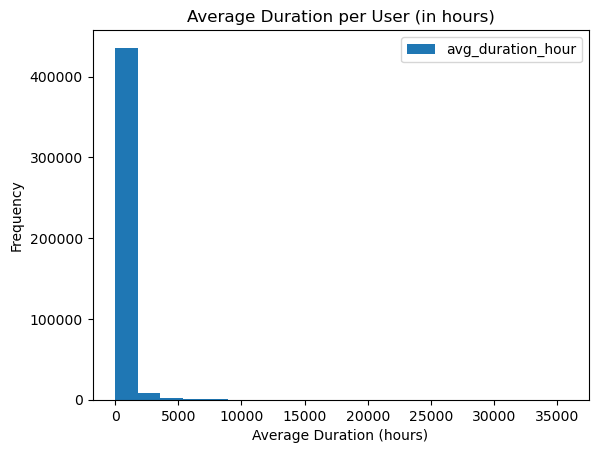

In [15]:
merged_sum.plot(kind='hist', bins=20, title='Average Duration per User (in hours)', xlabel='Average Duration (hours)', ylabel='Frequency')

<Axes: title={'center': 'Average Duration per User (in hours) for users with less than 5000 hours'}, xlabel='Average Duration (hours)', ylabel='Frequency'>

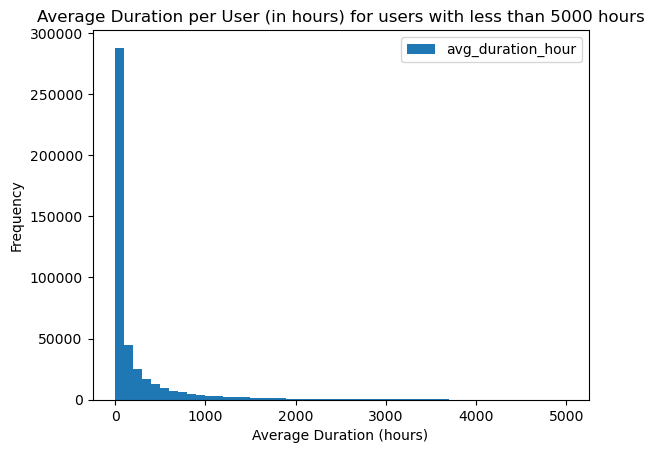

In [16]:
less_5000 = merged_sum[merged_sum['avg_duration_hour'] <= 5000]
less_5000.plot(kind='hist', bins=50, title='Average Duration per User (in hours) for users with less than 5000 hours', xlabel='Average Duration (hours)', ylabel='Frequency')

<Axes: title={'center': 'Average Duration per User (in hours) for users with less than 1000 hours'}, xlabel='Average Duration (hours)', ylabel='Frequency'>

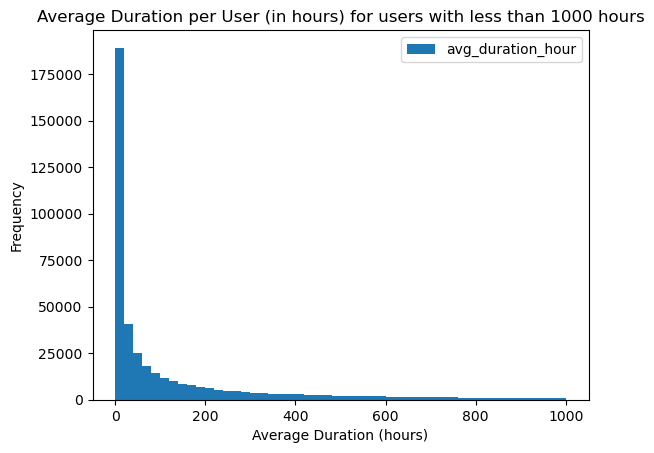

In [17]:
less_5000 = merged_sum[merged_sum['avg_duration_hour'] <= 1000]
less_5000.plot(kind='hist', bins=50, title='Average Duration per User (in hours) for users with less than 1000 hours', xlabel='Average Duration (hours)', ylabel='Frequency')

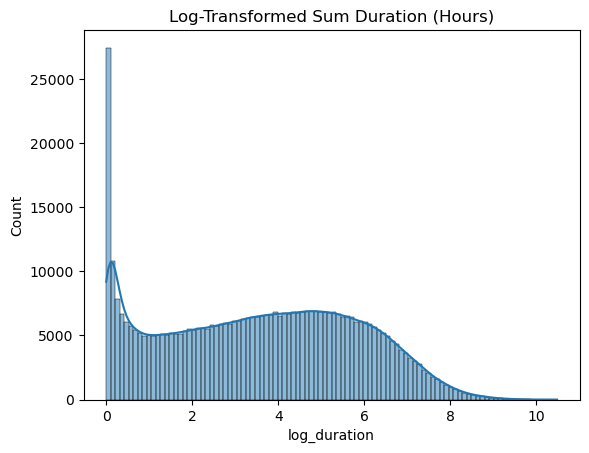

In [18]:
merged_sum['log_duration'] = np.log1p(merged_sum['avg_duration_hour'])
sns.histplot(merged_sum['log_duration'], bins=100, kde=True)
plt.title("Log-Transformed Sum Duration (Hours)")
plt.show()

<Axes: title={'center': 'Cumulative Duration per User (in hours)'}, xlabel='Cumulative Duration (hours)', ylabel='Frequency'>

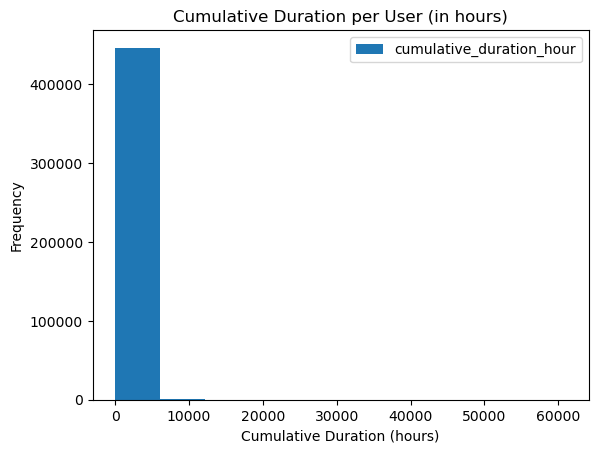

In [19]:
hours_sum = pd.concat([sum_00, sum_01, sum_02, sum_03, sum_04, sum_05, sum_06, sum_07], ignore_index=True)
hours_sum = hours_sum.replace(np.nan, 0)
hours_sum = hours_sum.groupby('guid').sum().sort_values(by='guid')
hours_sum['sum(duration_ms)'] = hours_sum['sum(duration_ms)'] / 3600000
hours_sum = hours_sum.rename(columns={'sum(duration_ms)': 'cumulative_duration_hour'})
hours_sum.plot(kind='hist', bins=10, title='Cumulative Duration per User (in hours)', xlabel='Cumulative Duration (hours)', ylabel='Frequency')

In [20]:
hours_sum.describe()

,cumulative_duration_hour
count,447967.000000
mean,292.151715
std,826.353698
min,0.000000
25%,4.363287
50%,39.823275
75%,231.911764
max,61033.096391


<Axes: title={'center': 'Cumulative Duration per User (in hours) for users with less than 5000 hours'}, xlabel='Cumulative Duration (hours)', ylabel='Frequency'>

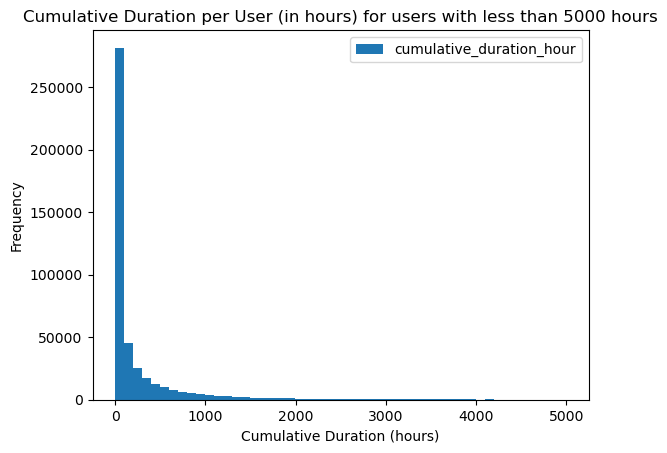

In [21]:
hours_sum_5000_less = hours_sum[hours_sum['cumulative_duration_hour'] <= 5000]
hours_sum_5000_less.plot(kind='hist', bins=50, title='Cumulative Duration per User (in hours) for users with less than 5000 hours', xlabel='Cumulative Duration (hours)', ylabel='Frequency')

<Axes: title={'center': 'Cumulative Duration per User (in hours) for users with less than 2000 hours'}, xlabel='Cumulative Duration (hours)', ylabel='Frequency'>

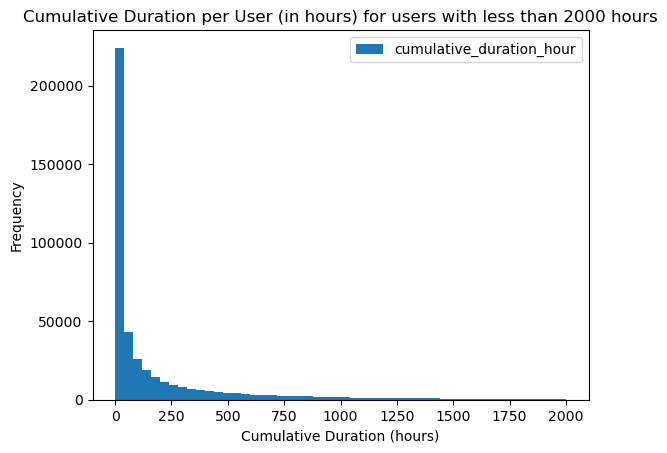

In [22]:
hours_sum_5000_less = hours_sum[hours_sum['cumulative_duration_hour'] <= 2000]
hours_sum_5000_less.plot(kind='hist', bins=50, title='Cumulative Duration per User (in hours) for users with less than 2000 hours', xlabel='Cumulative Duration (hours)', ylabel='Frequency')

<Axes: title={'center': 'Cumulative Duration per User (in hours) for users with less than 1000 hours'}, xlabel='Cumulative Duration (hours)', ylabel='Frequency'>

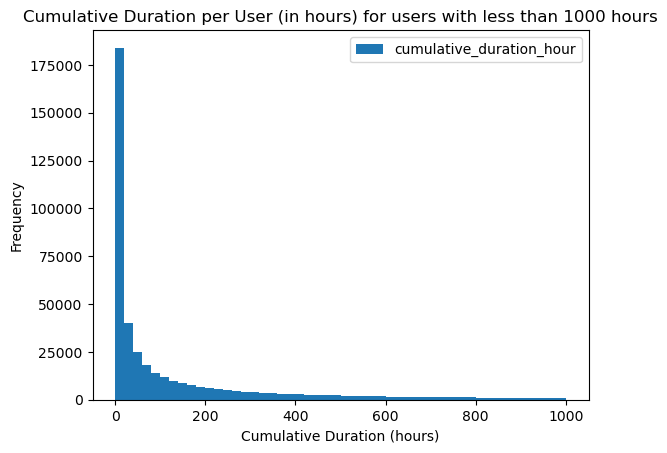

In [23]:
hours_sum_5000_less = hours_sum[hours_sum['cumulative_duration_hour'] <= 1000]
hours_sum_5000_less.plot(kind='hist', bins=50, title='Cumulative Duration per User (in hours) for users with less than 1000 hours', xlabel='Cumulative Duration (hours)', ylabel='Frequency')

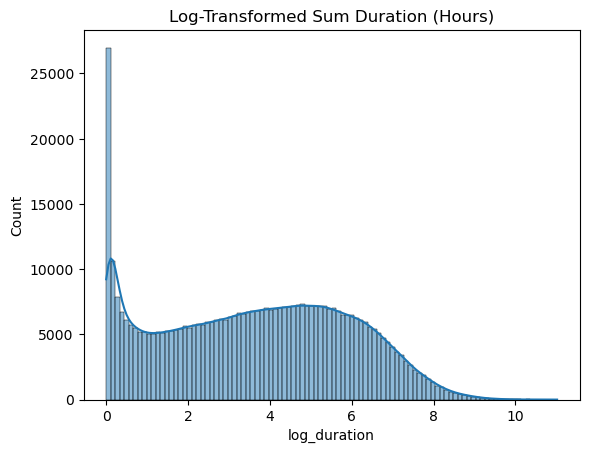

In [24]:
hours_sum['log_duration'] = np.log1p(hours_sum['cumulative_duration_hour'])
sns.histplot(hours_sum['log_duration'], bins=100, kde=True)
plt.title("Log-Transformed Sum Duration (Hours)")
plt.show()

In [25]:
# Aggregating parent category and sub-category durations
parent_subcat_00 = con.execute(f"SELECT guid, parent_category, sub_category, SUM(duration_ms) FROM webcat_view_V2 GROUP BY guid, parent_category, sub_category ORDER BY guid").fetchdf()
parent_subcat_01 = con.execute(f"SELECT guid, parent_category, sub_category, SUM(duration_ms) FROM webcat_view_V2_01 GROUP BY guid, parent_category, sub_category ORDER BY guid").fetchdf()
parent_subcat_02 = con.execute(f"SELECT guid, parent_category, sub_category, SUM(duration_ms) FROM webcat_view_V2_02 GROUP BY guid, parent_category, sub_category ORDER BY guid").fetchdf()
parent_subcat_03 = con.execute(f"SELECT guid, parent_category, sub_category, SUM(duration_ms) FROM webcat_view_V2_03 GROUP BY guid, parent_category, sub_category ORDER BY guid").fetchdf()
parent_subcat_04 = con.execute(f"SELECT guid, parent_category, sub_category, SUM(duration_ms) FROM webcat_view_V2_04 GROUP BY guid, parent_category, sub_category ORDER BY guid").fetchdf()
parent_subcat_05 = con.execute(f"SELECT guid, parent_category, sub_category, SUM(duration_ms) FROM webcat_view_V2_05 GROUP BY guid, parent_category, sub_category ORDER BY guid").fetchdf()
parent_subcat_06 = con.execute(f"SELECT guid, parent_category, sub_category, SUM(duration_ms) FROM webcat_view_V2_06 GROUP BY guid, parent_category, sub_category ORDER BY guid").fetchdf()
parent_subcat_07 = con.execute(f"SELECT guid, parent_category, sub_category, SUM(duration_ms) FROM webcat_view_V2_07 GROUP BY guid, parent_category, sub_category ORDER BY guid").fetchdf()

┌─────────────────────────────────────┐
│┌───────────────────────────────────┐│
││    Query Profiling Information    ││
│└───────────────────────────────────┘│
└─────────────────────────────────────┘
SELECT guid, parent_category, sub_category, SUM(duration_ms) FROM webcat_view_V2 GROUP BY guid, parent_category, sub_category ORDER BY guid
┌────────────────────────────────────────────────┐
│┌──────────────────────────────────────────────┐│
││              Total Time: 0.342s              ││
│└──────────────────────────────────────────────┘│
└────────────────────────────────────────────────┘
┌────────────────────────────────────────────────┐
│               Optimizer: 0.0002s               │
│┌──────────────────────────────────────────────┐│
││        Build Side Probe Side: 0.0000s        ││
││           Column Lifetime: 0.0000s           ││
││           Common Aggregate: 0.0000s          ││
││        Common Subexpressions: 0.0000s        ││
││      Compressed Materialization: 0.0000s     

In [26]:
# Combine all parent category and subcategory dataframes
parent_subcat_combined = pd.concat([parent_subcat_00, parent_subcat_01, parent_subcat_02, parent_subcat_03, parent_subcat_04, parent_subcat_05, parent_subcat_06, parent_subcat_07], ignore_index=True)
# Replace NaN with 0 for aggregation
parent_subcat_combined = parent_subcat_combined.replace(np.nan, 0) 
# Group by guid, parent_category, and subcategory, and sum the duration_ms
parent_subcat_aggregated = parent_subcat_combined.groupby(['guid', 'parent_category', 'sub_category']).mean().reset_index()
parent_subcat_aggregated['sum(duration_ms)'] = parent_subcat_aggregated['sum(duration_ms)'] / 3600000
parent_subcat_aggregated = parent_subcat_aggregated.rename(columns={'sum(duration_ms)': 'avg_duration_hour'})
parent_subcat_aggregated = parent_subcat_aggregated.sort_values(by='guid')

In [27]:
parent_subcat_aggregated.head()

,guid,parent_category,sub_category,avg_duration_hour
0,0000215f64624fbc99f8c23800d7e60f,entertainment,video streaming,16.977175
1,0000215f64624fbc99f8c23800d7e60f,mail,mail,2.356386
2,0000215f64624fbc99f8c23800d7e60f,other,unclassified,14.259384
3,0000215f64624fbc99f8c23800d7e60f,search,search,0.770549
20,0000840b7c804caf8e3890735a080332,social,social network,74.422898


In [28]:
# Combine all parent category and subcategory dataframes
parent_subcat_combined = pd.concat([parent_subcat_00, parent_subcat_01, parent_subcat_02, parent_subcat_03, parent_subcat_04, parent_subcat_05, parent_subcat_06, parent_subcat_07], ignore_index=True)
# Replace NaN with 0 for aggregation
parent_subcat_combined = parent_subcat_combined.replace(np.nan, 0) 
# Group by guid, parent_category, and subcategory, and sum the duration_ms
parent_subcat_sum = parent_subcat_combined.groupby(['guid', 'parent_category', 'sub_category']).sum().reset_index()
parent_subcat_sum['sum(duration_ms)'] = parent_subcat_sum['sum(duration_ms)'] / 3600000
parent_subcat_sum = parent_subcat_sum.rename(columns={'sum(duration_ms)': 'sum_duration_hour'})
parent_subcat_sum = parent_subcat_sum.sort_values(by='guid')
parent_subcat_sum.head()

,guid,parent_category,sub_category,sum_duration_hour
0,0000215f64624fbc99f8c23800d7e60f,entertainment,video streaming,16.977175
1,0000215f64624fbc99f8c23800d7e60f,mail,mail,2.356386
2,0000215f64624fbc99f8c23800d7e60f,other,unclassified,14.259384
3,0000215f64624fbc99f8c23800d7e60f,search,search,0.770549
20,0000840b7c804caf8e3890735a080332,social,social network,74.422898


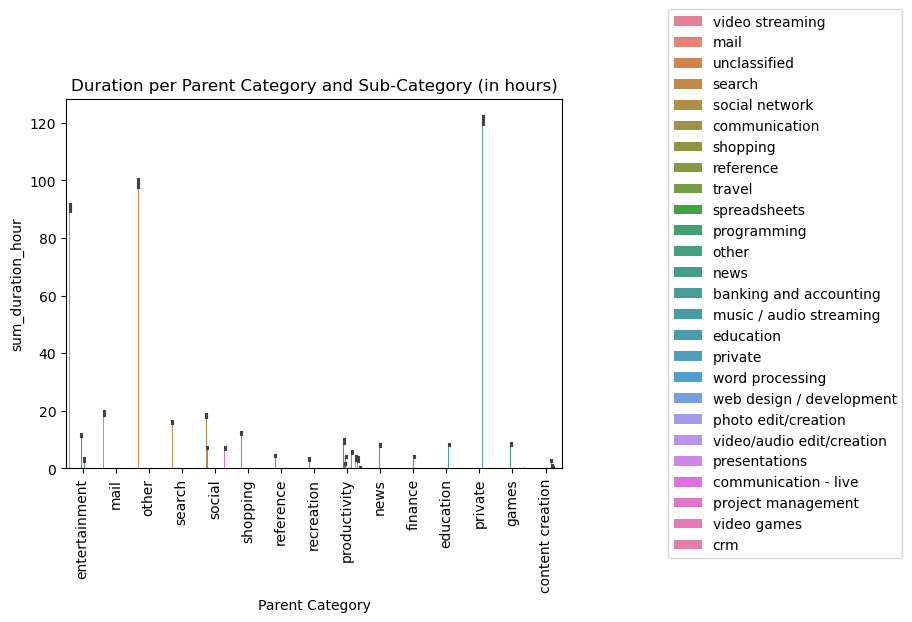

In [29]:
sns.barplot(data=parent_subcat_sum, x='parent_category', y='sum_duration_hour', hue='sub_category')
plt.xticks(rotation=90)
plt.title('Duration per Parent Category and Sub-Category (in hours)')
plt.xlabel('Parent Category')
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

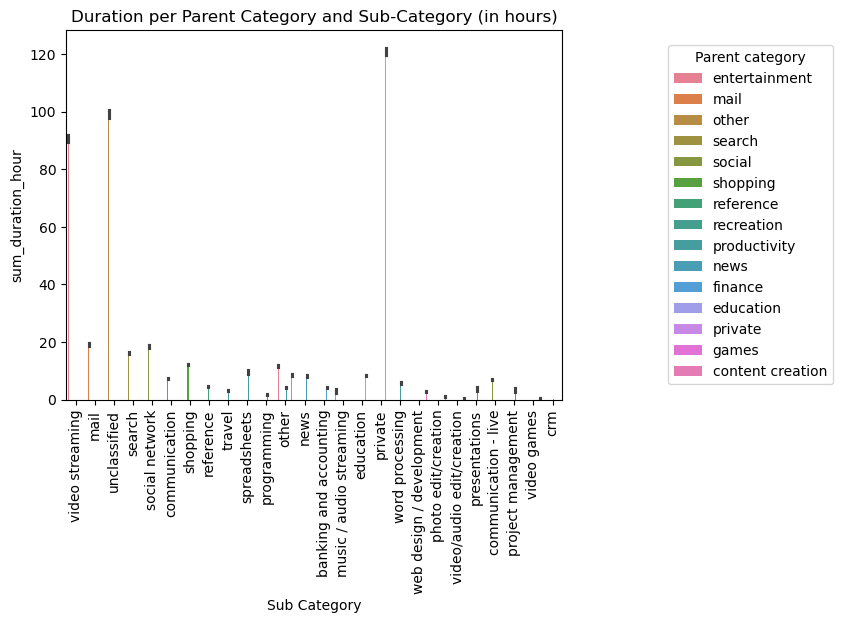

In [30]:
sns.barplot(data=parent_subcat_sum, x='sub_category', y='sum_duration_hour', hue='parent_category')
plt.xticks(rotation=90)
plt.title('Duration per Parent Category and Sub-Category (in hours)')
plt.xlabel('Sub Category')
plt.legend(title='Parent category', loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

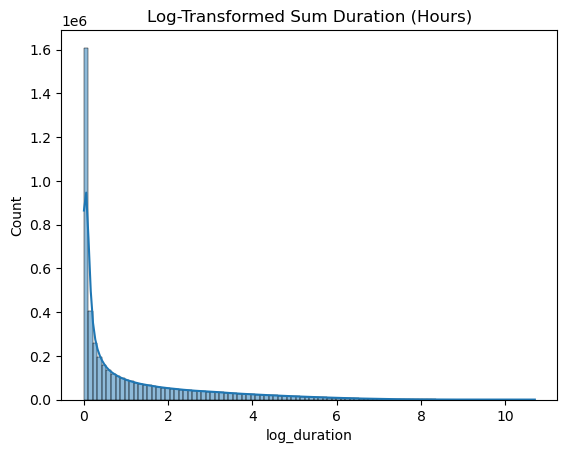

In [64]:
parent_subcat_sum['log_duration'] = np.log1p(parent_subcat_sum['sum_duration_hour'])
sns.histplot(parent_subcat_sum['log_duration'], bins=100, kde=True)
plt.title("Log-Transformed Sum Duration (Hours)")
plt.show()

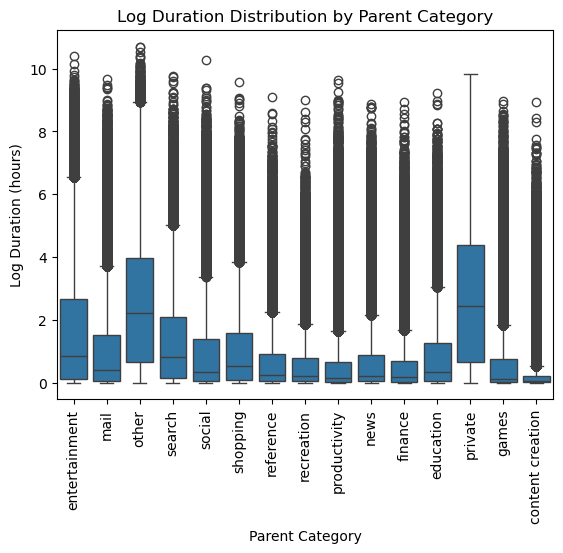

In [69]:
sns.boxplot(data=parent_subcat_sum, x='parent_category', y='log_duration')
plt.title('Log Duration Distribution by Parent Category')
plt.xlabel('Parent Category')
plt.ylabel('Log Duration (hours)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
parent_subcat_sum['parent_category'].unique()

array(['entertainment', 'mail', 'other', 'search', 'social', 'shopping',
       'reference', 'recreation', 'productivity', 'news', 'finance',
       'education', 'private', 'games', 'content creation'], dtype=object)

In [62]:
parent_subcat_sum['sub_category'].unique()

array(['video streaming', 'mail', 'unclassified', 'search',
       'social network', 'communication', 'shopping', 'reference',
       'travel', 'spreadsheets', 'programming', 'other', 'news',
       'banking and accounting', 'music / audio streaming', 'education',
       'private', 'word processing', 'web design / development',
       'photo edit/creation', 'video/audio edit/creation',
       'presentations', 'communication - live', 'project management',
       'video games', 'crm'], dtype=object)

/var/folders/t3/pjw083nx7_b0p78lsvshw6yc0000gn/T/ipykernel_61797/835697140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entertainment_sum['log_duration'] = np.log1p(entertainment_sum['sum_duration_hour'])


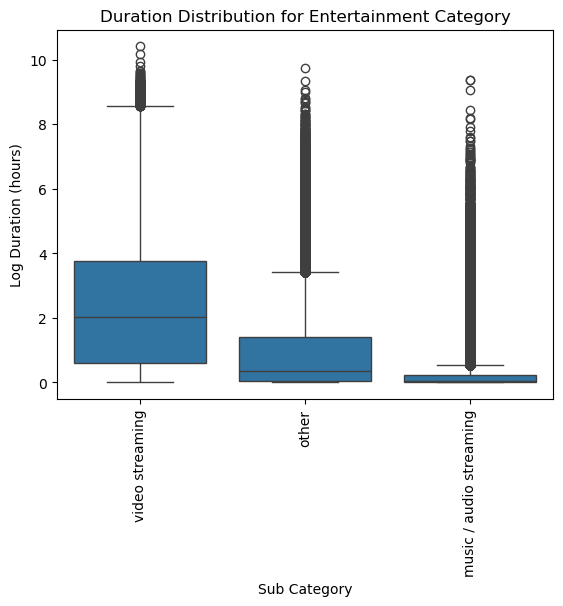

In [58]:
# Comparing distribution across parent categories
# entertainment category
entertainment_sum = parent_subcat_sum[parent_subcat_sum['parent_category'] == 'entertainment']
entertainment_sum['log_duration'] = np.log1p(entertainment_sum['sum_duration_hour'])
sns.boxplot(data=entertainment_sum, x='sub_category', y='log_duration')
plt.title('Duration Distribution for Entertainment Category')
plt.xlabel('Sub Category')
plt.ylabel('Log Duration (hours)')
plt.xticks(rotation=90)
plt.show()

/var/folders/t3/pjw083nx7_b0p78lsvshw6yc0000gn/T/ipykernel_61797/3779001740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_sum['log_duration'] = np.log1p(content_sum['sum_duration_hour'])


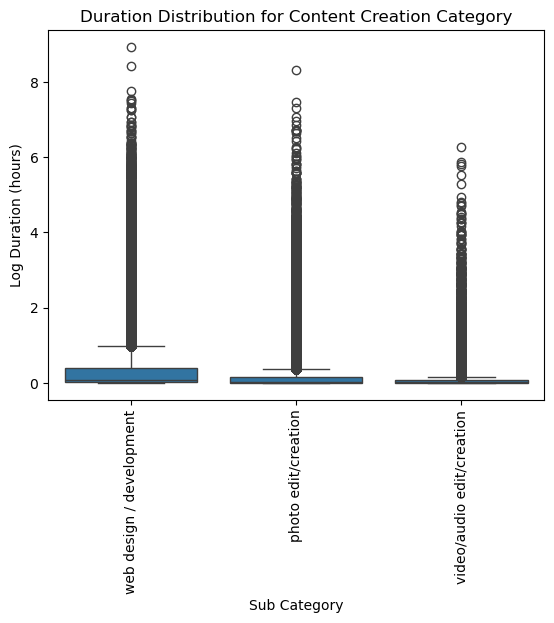

In [63]:
content_sum = parent_subcat_sum[parent_subcat_sum['parent_category'] == 'content creation']
content_sum['log_duration'] = np.log1p(content_sum['sum_duration_hour'])
sns.boxplot(data=content_sum, x='sub_category', y='log_duration')
plt.title('Duration Distribution for Content Creation Category')
plt.xlabel('Sub Category')
plt.ylabel('Log Duration (hours)')
plt.xticks(rotation=90)
plt.show()

/var/folders/t3/pjw083nx7_b0p78lsvshw6yc0000gn/T/ipykernel_61797/557245623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  productivity_sum['log_duration'] = np.log1p(productivity_sum['sum_duration_hour'])


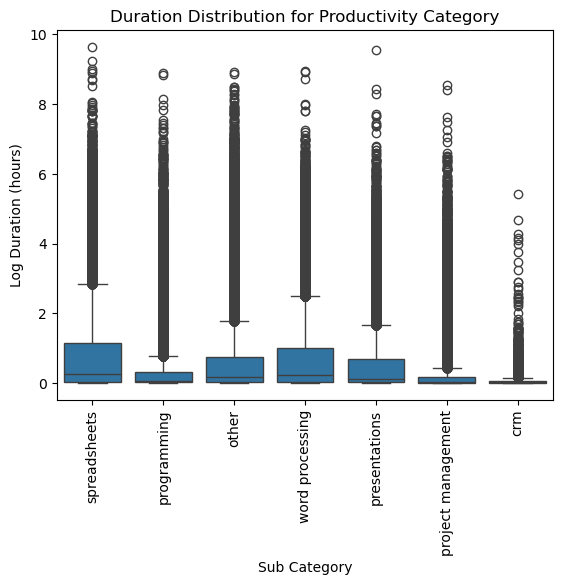

In [72]:
# Productivity category
productivity_sum = parent_subcat_sum[parent_subcat_sum['parent_category'] == 'productivity']
productivity_sum['log_duration'] = np.log1p(productivity_sum['sum_duration_hour'])
sns.boxplot(data=productivity_sum, x='sub_category', y='log_duration')
plt.title('Duration Distribution for Productivity Category')
plt.xlabel('Sub Category')
plt.ylabel('Log Duration (hours)')
plt.xticks(rotation=90)
plt.show()

/var/folders/t3/pjw083nx7_b0p78lsvshw6yc0000gn/T/ipykernel_61797/45341041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  social_sum['log_duration'] = np.log1p(social_sum['sum_duration_hour'])


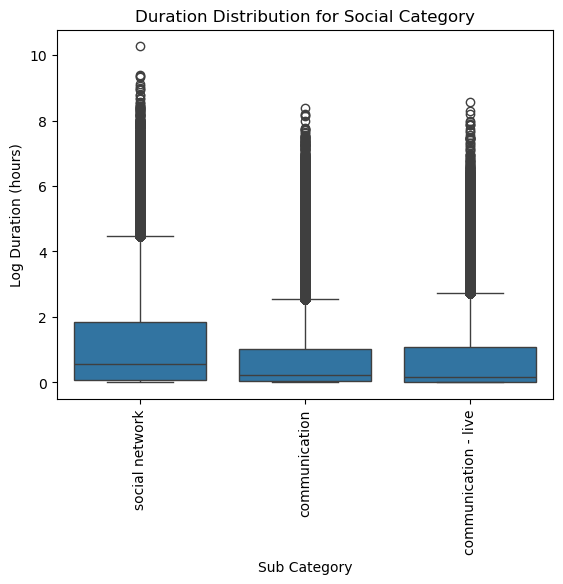

In [73]:
# Social only
social_sum = parent_subcat_sum[parent_subcat_sum['parent_category'] == 'social']
social_sum['log_duration'] = np.log1p(social_sum['sum_duration_hour'])
sns.boxplot(data=social_sum, x='sub_category', y='log_duration')
plt.title('Duration Distribution for Social Category')
plt.xlabel('Sub Category')
plt.ylabel('Log Duration (hours)')
plt.xticks(rotation=90)
plt.show()

/var/folders/t3/pjw083nx7_b0p78lsvshw6yc0000gn/T/ipykernel_61797/4031409688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_sum['log_duration'] = np.log1p(games_sum['sum_duration_hour'])


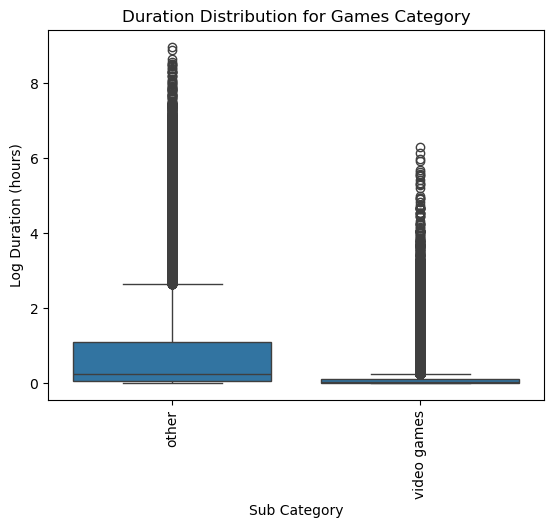

In [74]:
# games only
games_sum = parent_subcat_sum[parent_subcat_sum['parent_category'] == 'games']
games_sum['log_duration'] = np.log1p(games_sum['sum_duration_hour'])
sns.boxplot(data=games_sum, x='sub_category', y='log_duration')
plt.title('Duration Distribution for Games Category')
plt.xlabel('Sub Category')
plt.ylabel('Log Duration (hours)')
plt.xticks(rotation=90)
plt.show()

In [32]:
# Only grouping by subcategory
parent_subcat_combined = pd.concat([parent_subcat_00, parent_subcat_01, parent_subcat_02, parent_subcat_03, parent_subcat_04, parent_subcat_05, parent_subcat_06, parent_subcat_07], ignore_index=True)
# Replace NaN with 0 for aggregation
parent_subcat_combined = parent_subcat_combined.replace(np.nan, 0)
parent_subcat_combined.head()

subcat_combined = parent_subcat_combined[['guid', 'sub_category', 'sum(duration_ms)']]
subcat_combined_sum = subcat_combined.groupby(['guid', 'sub_category']).sum().reset_index()
subcat_combined_sum['sum(duration_ms)'] = subcat_combined_sum['sum(duration_ms)'] / 3600000
subcat_combined_sum = subcat_combined_sum.rename(columns={'sum(duration_ms)': 'sum_duration_hour'})
subcat_combined_sum = subcat_combined_sum.sort_values(by='guid')

In [33]:
subcat_combined_sum.describe()

,sum_duration_hour
count,4.437768e+06
mean,2.949103e+01
std,2.065347e+02
min,0.000000e+00
25%,5.480604e-02
50%,5.400908e-01
75%,5.180301e+00
max,4.455005e+04


<Axes: title={'center': 'Duration per Sub-Category (in hours)'}, xlabel='Duration (hours)', ylabel='Frequency'>

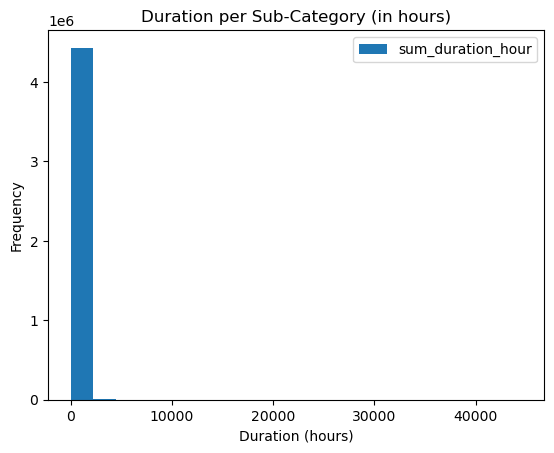

In [34]:
subcat_combined_sum.plot(kind='hist', bins=20, title='Duration per Sub-Category (in hours)', xlabel='Duration (hours)', ylabel='Frequency')

<Axes: title={'center': 'Duration per Sub-Category (in hours) for users with less than 5000 hours'}, xlabel='Duration (hours)', ylabel='Frequency'>

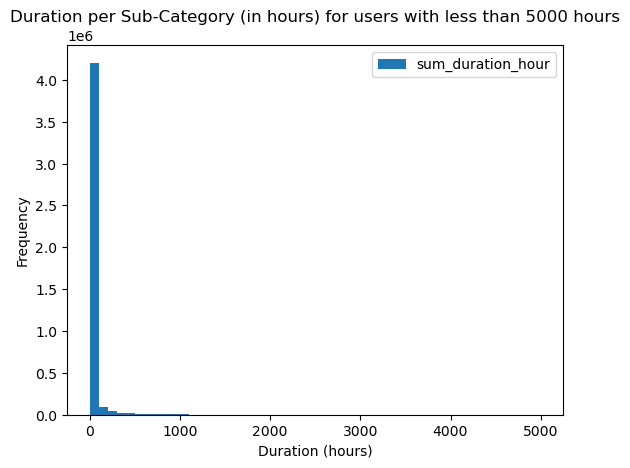

In [35]:
subcat_5000_less = subcat_combined_sum[subcat_combined_sum['sum_duration_hour'] <= 5000]
subcat_5000_less.plot(kind='hist', bins=50, title='Duration per Sub-Category (in hours) for users with less than 5000 hours', xlabel='Duration (hours)', ylabel='Frequency')

<Axes: title={'center': 'Duration per Sub-Category (in hours) for users with less than 1000 hours'}, xlabel='Duration (hours)', ylabel='Frequency'>

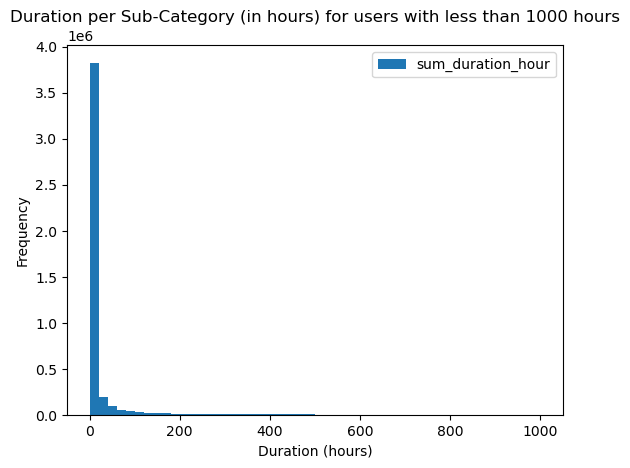

In [36]:
subcat_1000_less = subcat_combined_sum[subcat_combined_sum['sum_duration_hour'] <= 1000]
subcat_1000_less.plot(kind='hist', bins=50, title='Duration per Sub-Category (in hours) for users with less than 1000 hours', xlabel='Duration (hours)', ylabel='Frequency')

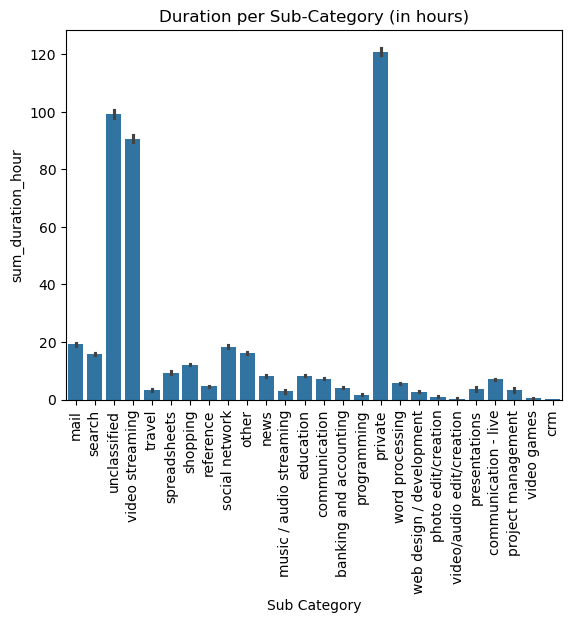

In [37]:
subcat_combined_sum_no_guid = subcat_combined_sum.drop(columns=['guid'])

sns.barplot(data=subcat_combined_sum, x='sub_category', y='sum_duration_hour')
plt.xticks(rotation=90)
plt.title('Duration per Sub-Category (in hours)')
plt.xlabel('Sub Category')
plt.show()

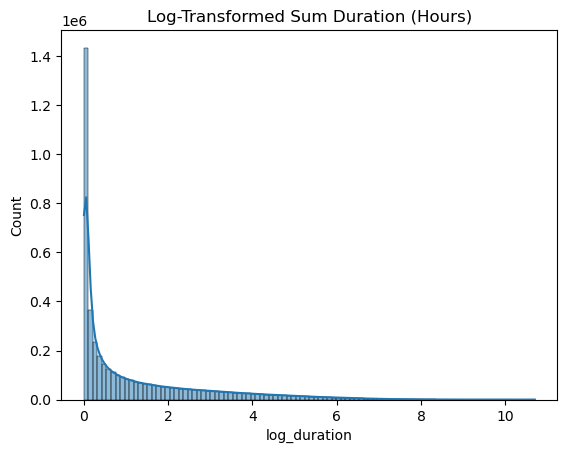

In [38]:
subcat_combined_sum['log_duration'] = np.log1p(subcat_combined_sum['sum_duration_hour'])
sns.histplot(subcat_combined_sum['log_duration'], bins=100, kde=True)
plt.title("Log-Transformed Sum Duration (Hours)")
plt.show()

In [39]:
subcat_combined_sum.describe()

,sum_duration_hour,log_duration
count,4.437768e+06,4.437768e+06
mean,2.949103e+01,1.189153e+00
std,2.065347e+02,1.573967e+00
min,0.000000e+00,0.000000e+00
25%,5.480604e-02,5.335690e-02
50%,5.400908e-01,4.318414e-01
75%,5.180301e+00,1.821367e+00
max,4.455005e+04,1.070439e+01


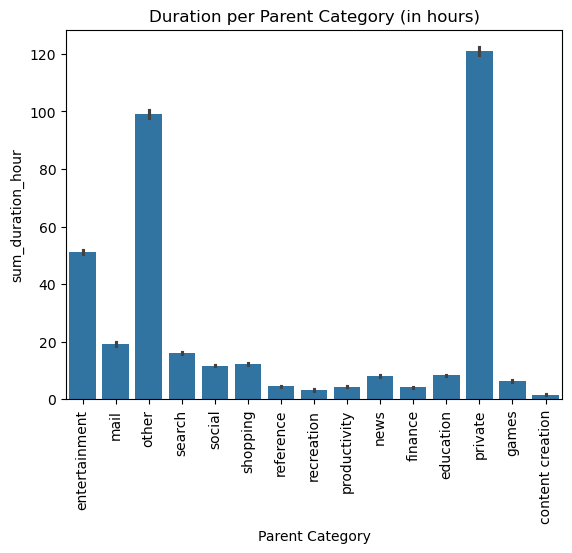

In [40]:
parent_only = parent_subcat_sum.drop(columns=['sub_category'])
parent_only_no_guid = parent_only.drop(columns=['guid'])

sns.barplot(data=parent_only, x='parent_category', y='sum_duration_hour')
plt.xticks(rotation=90)
plt.title('Duration per Parent Category (in hours)')
plt.xlabel('Parent Category')
plt.show()

In [41]:
parent_only_no_guid.describe()

,sum_duration_hour
count,4.782677e+06
mean,2.736424e+01
std,1.989551e+02
min,0.000000e+00
25%,4.971472e-02
50%,4.650589e-01
75%,4.390244e+00
max,4.455005e+04


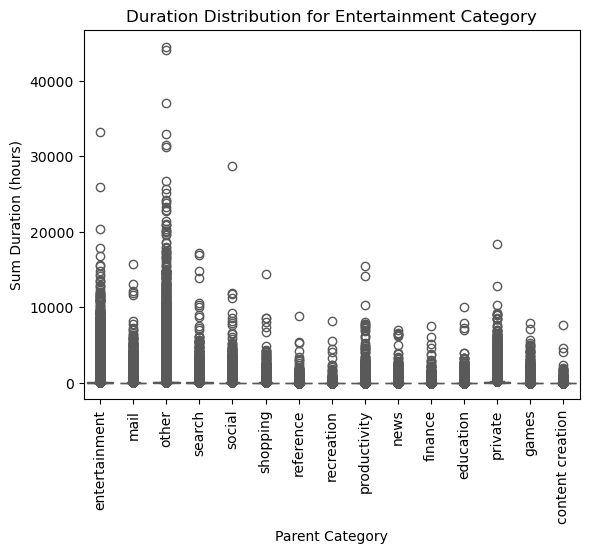

In [42]:
# Plotting distribution for entertainment
sns.boxplot(data=parent_only, x='parent_category', y='sum_duration_hour', hue='parent_category', palette='Set2')
plt.title('Duration Distribution for Entertainment Category')
plt.xlabel('Parent Category')
plt.ylabel('Sum Duration (hours)')
plt.xticks(rotation=90)
plt.show()

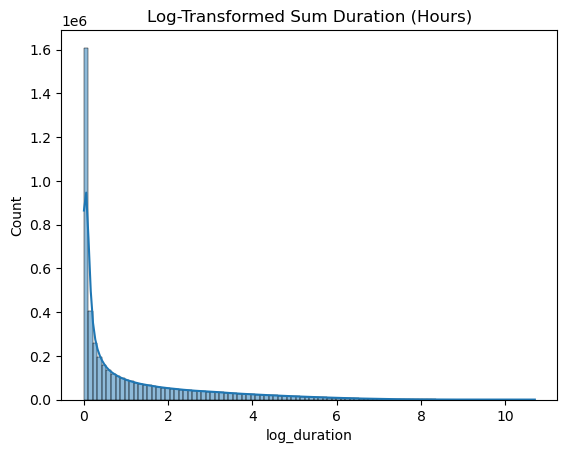

In [43]:
parent_only['log_duration'] = np.log1p(parent_only['sum_duration_hour'])
sns.histplot(parent_only['log_duration'], bins=100, kde=True)
plt.title("Log-Transformed Sum Duration (Hours)")
plt.show()

In [44]:
# Calculating mean duration (in hours) per parent category and sub-category
mean_hours_parent_subcat = parent_subcat_aggregated.groupby(['parent_category', 'sub_category'])['avg_duration_hour'].mean().reset_index()
mean_hours_parent_subcat = mean_hours_parent_subcat.sort_values(by='avg_duration_hour', ascending=False).reset_index(drop=True)
mean_hours_parent_subcat

,parent_category,sub_category,avg_duration_hour
0,private,private,105.907788
1,other,unclassified,86.593710
2,entertainment,video streaming,79.366113
3,mail,mail,16.832689
4,social,social network,15.902253
5,search,search,13.909879
6,shopping,shopping,10.659516
7,entertainment,other,10.248016
8,productivity,spreadsheets,8.253753
9,games,other,7.380333


<Axes: title={'center': 'Average Duration per Parent Category and Sub-Category (in hours)'}, xlabel='Average Duration (hours)', ylabel='Frequency'>

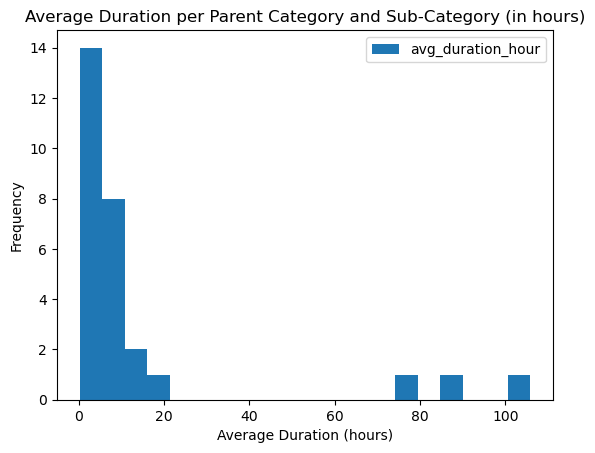

In [45]:
mean_hours_parent_subcat.plot(kind='hist', bins=20, title='Average Duration per Parent Category and Sub-Category (in hours)', xlabel='Average Duration (hours)', ylabel='Frequency')

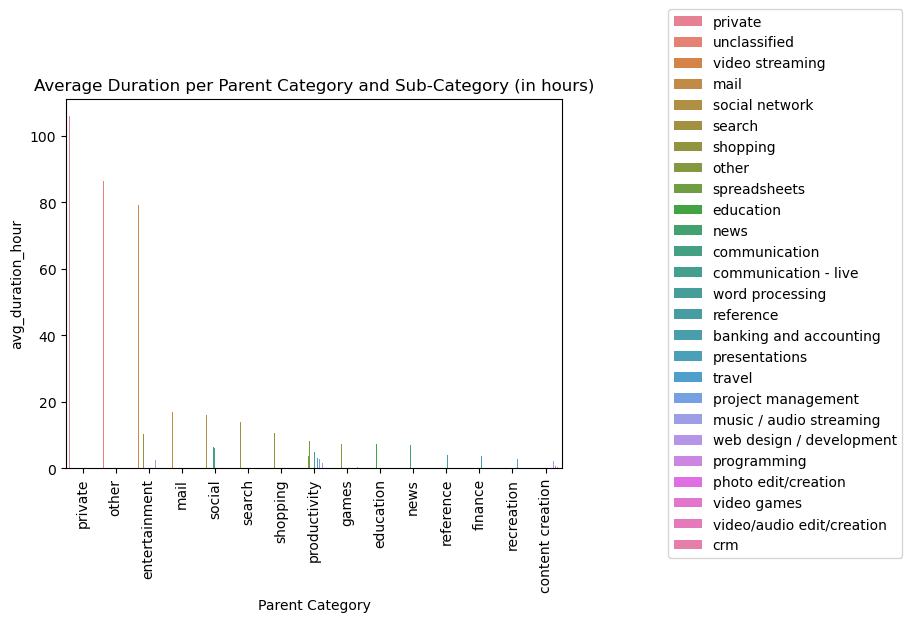

In [46]:
sns.barplot(data=mean_hours_parent_subcat, x='parent_category', y='avg_duration_hour', hue='sub_category')
plt.xticks(rotation=90)
plt.title('Average Duration per Parent Category and Sub-Category (in hours)')
plt.xlabel('Parent Category')
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

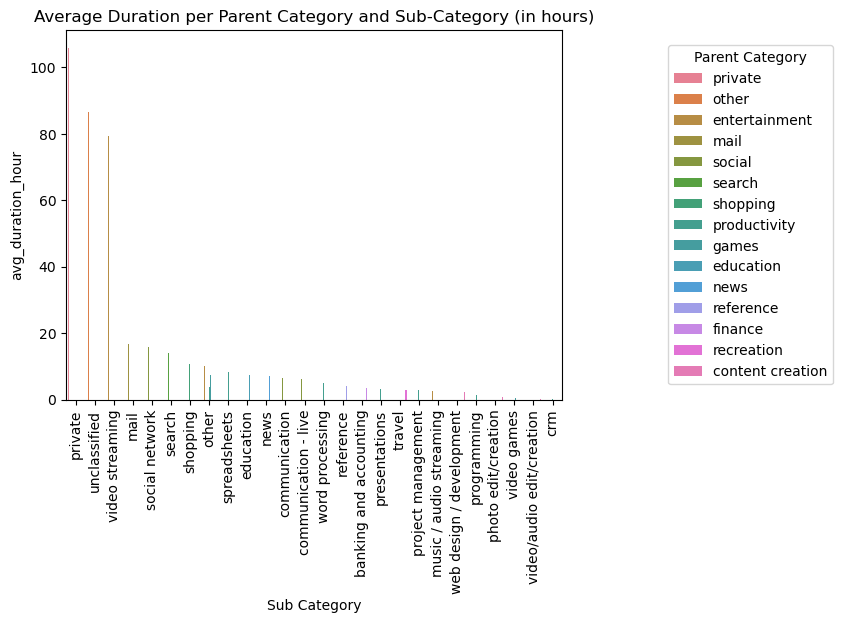

In [47]:
sns.barplot(data=mean_hours_parent_subcat, x='sub_category', y='avg_duration_hour', hue='parent_category')
plt.xticks(rotation=90)
plt.title('Average Duration per Parent Category and Sub-Category (in hours)')
plt.xlabel('Sub Category')
plt.legend(title='Parent Category',loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

In [48]:
# mean_hours_parent_subcat.to_csv('/Users/couch/intel_research/energy_explore/browser_eda/mean_hours_parent_subcat.csv', index=False)

In [49]:
pivot_df = parent_subcat_aggregated.pivot_table(
    index='guid',
    columns=['parent_category', 'sub_category'],
    values='avg_duration_hour',
    fill_value=0
)
pivot_df.head()

# pivot_df.to_csv('/Users/couch/intel_research/data/web_cat_usage_v2/pivoted_parent_subcat.csv')

parent_category                     content creation  \
sub_category                     photo edit/creation   
guid                                                   
0000215f64624fbc99f8c23800d7e60f                 0.0   
0000840b7c804caf8e3890735a080332                 0.0   
000091c0adc149389235ed2c5f15a59e                 0.0   
0000af8fab2d4669bad5917875158ab9                 0.0   
0000b5c7c1f54766873622d2f8786458                 0.0   

parent_category                                             \
sub_category                     video/audio edit/creation   
guid                                                         
0000215f64624fbc99f8c23800d7e60f                       0.0   
0000840b7c804caf8e3890735a080332                       0.0   
000091c0adc149389235ed2c5f15a59e                       0.0   
0000af8fab2d4669bad5917875158ab9                       0.0   
0000b5c7c1f54766873622d2f8786458                       0.0   

parent_category                                           education  \
sub_category                     web design / development education   
guid                                                                  
0000215f64624fbc99f8c23800d7e60f                 0.000000  0.000000   
0000840b7c804caf8e3890735a080332                 0.000000  0.369066   
000091c0adc149389235ed2c5f15a59e                 0.000000  0.000000   
0000af8fab2d4669bad5917875158ab9                 0.023478  3.759260   
0000b5c7c1f54766873622d2f8786458                 0.000000  0.000000   

parent_category                            entertainment             \
sub_category                     music / audio streaming      other   
guid                                                                  
0000215f64624fbc99f8c23800d7e60f                 0.00000   0.000000   
0000840b7c804caf8e3890735a080332                 1.65303  16.944852   
000091c0adc149389235ed2c5f15a59e                 0.00000   0.005916   
0000af8fab2d4669bad5917875158ab9                 0.00000   0.565321   
0000b5c7c1f54766873622d2f8786458                 0.00000   0.000000   

parent_category                                                 finance  \
sub_category                     video streaming banking and accounting   
guid                                                                      
0000215f64624fbc99f8c23800d7e60f       16.977175               0.000000   
0000840b7c804caf8e3890735a080332       59.559806               0.063566   
000091c0adc149389235ed2c5f15a59e        0.000000               0.000000   
0000af8fab2d4669bad5917875158ab9        6.273500               0.000000   
0000b5c7c1f54766873622d2f8786458        0.164809               0.000000   

parent_category                      games              ...  \
sub_category                         other video games  ...   
guid                                                    ...   
0000215f64624fbc99f8c23800d7e60f  0.000000         0.0  ...   
0000840b7c804caf8e3890735a080332  0.000000         0.0  ...   
000091c0adc149389235ed2c5f15a59e  0.000000         0.0  ...   
0000af8fab2d4669bad5917875158ab9  0.010592         0.0  ...   
0000b5c7c1f54766873622d2f8786458  0.013390         0.0  ...   

parent_category                        productivity               \
sub_category                     project management spreadsheets   
guid                                                               
0000215f64624fbc99f8c23800d7e60f                0.0     0.000000   
0000840b7c804caf8e3890735a080332                0.0     0.008011   
000091c0adc149389235ed2c5f15a59e                0.0     0.000000   
0000af8fab2d4669bad5917875158ab9                0.0     0.000000   
0000b5c7c1f54766873622d2f8786458                0.0     0.000000   

parent_category                                  recreation reference  \
sub_category                     word processing     travel reference   
guid                                                                    
0000215f64624fbc99f8c23800d7e60f        0.0000

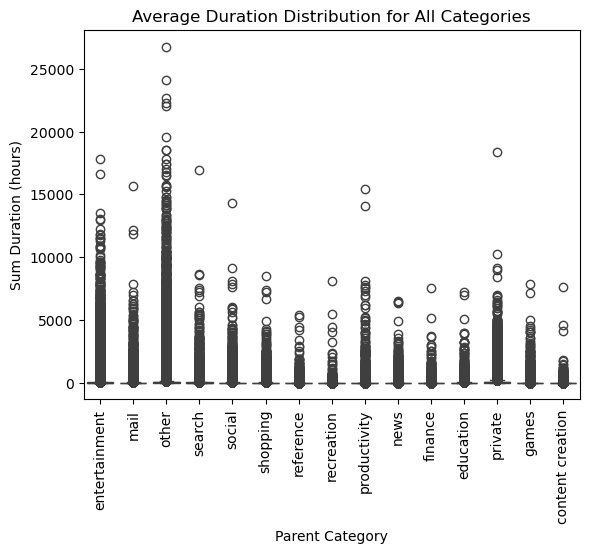

In [50]:
# Plotting distribution for entertainment
agg_parent_only = parent_subcat_aggregated.drop(columns=['sub_category'])
sns.boxplot(data=agg_parent_only, x='parent_category', y='avg_duration_hour')
plt.title('Average Duration Distribution for All Categories')
plt.xlabel('Parent Category')
plt.ylabel('Sum Duration (hours)')
plt.xticks(rotation=90)
plt.show()

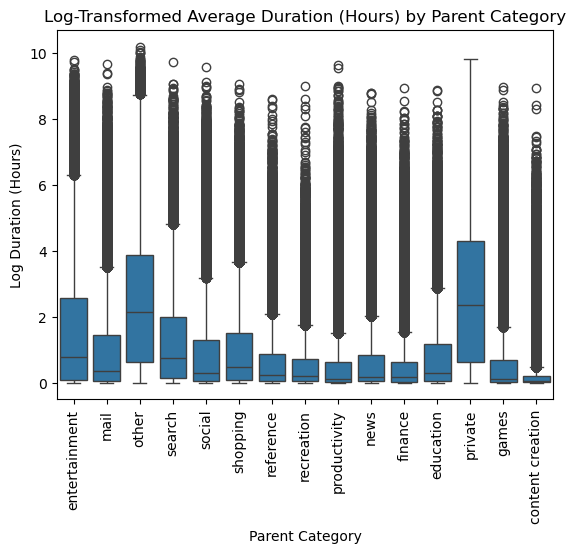

In [71]:
agg_parent_only['log_duration'] = np.log1p(agg_parent_only['avg_duration_hour'])
sns.boxplot(data=agg_parent_only, x='parent_category', y='log_duration')
plt.title("Log-Transformed Average Duration (Hours) by Parent Category")
plt.xlabel("Parent Category")
plt.ylabel("Log Duration (Hours)")
plt.xticks(rotation=90)
plt.show()

In [75]:
agg_parent_only.head()

,guid,parent_category,avg_duration_hour,log_duration
0,0000215f64624fbc99f8c23800d7e60f,entertainment,16.977175,2.889103
1,0000215f64624fbc99f8c23800d7e60f,mail,2.356386,1.210865
2,0000215f64624fbc99f8c23800d7e60f,other,14.259384,2.725195
3,0000215f64624fbc99f8c23800d7e60f,search,0.770549,0.571290
20,0000840b7c804caf8e3890735a080332,social,74.422898,4.323111


In [78]:
# KNN classifier attempt to cluster parent categories based on user habits
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=5, batch_size=10000)
kmeans.fit(agg_parent_only[["log_duration"]])

MiniBatchKMeans(batch_size=10000, n_clusters=5)

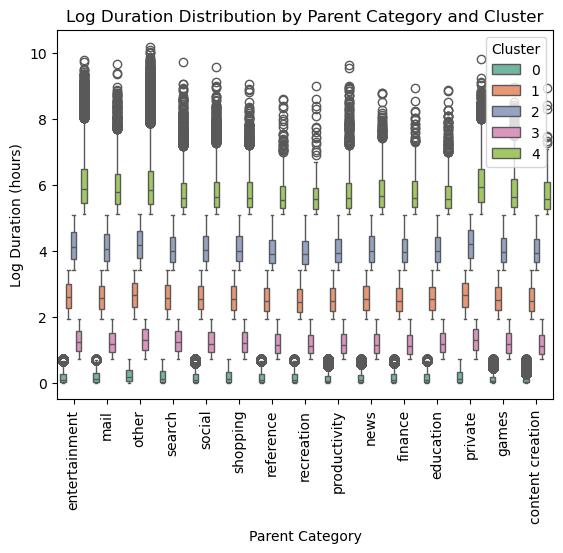

In [89]:
agg_parent_only['cluster'] = kmeans.labels_

sns.boxplot(data=agg_parent_only, x='parent_category', y='log_duration', hue='cluster', palette='Set2')
plt.title('Log Duration Distribution by Parent Category and Cluster')
plt.xlabel('Parent Category')
plt.ylabel('Log Duration (hours)')
plt.xticks(rotation=90)
plt.legend(title='Cluster')
plt.show()

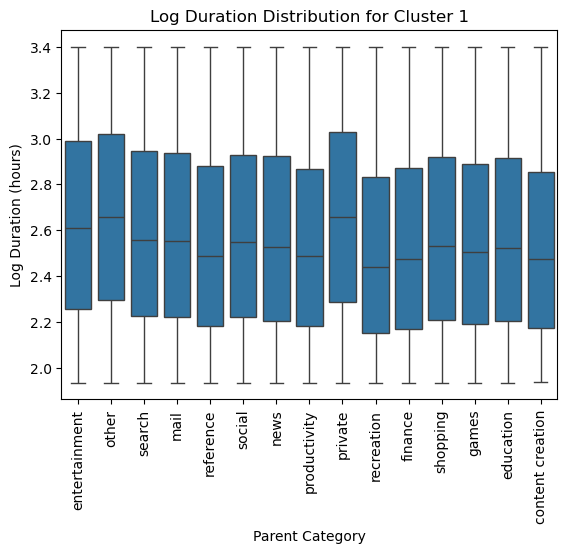

TypeError: scatter() missing 1 required positional argument: 'y'

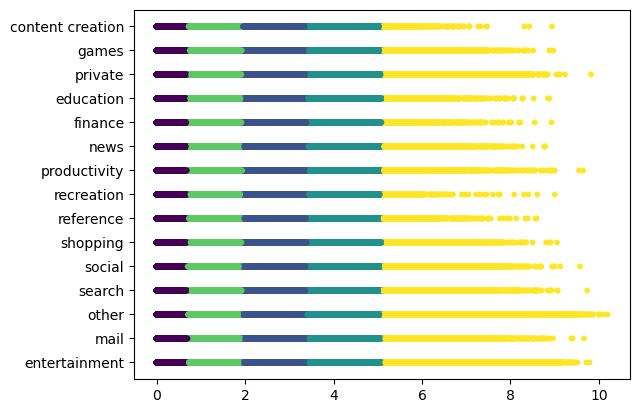

In [90]:
cluster_1_only = agg_parent_only[agg_parent_only['cluster'] == 1]
sns.boxplot(data=cluster_1_only, x='parent_category', y='log_duration')
plt.title('Log Duration Distribution for Cluster 1')
plt.xlabel('Parent Category')
plt.ylabel('Log Duration (hours)')
plt.xticks(rotation=90)
plt.show()

plt.scatter(agg_parent_only["log_duration"], agg_parent_only["parent_category"], c=agg_parent_only["cluster"], cmap="viridis", s=10)
plt.scatter(*kmeans.cluster_centers_.T, c='red', marker='x')
plt.title("MiniBatchKMeans Clustering")
plt.xlabel("Log Duration (Hours)")
plt.ylabel("Parent Category")
plt.show()

In [80]:
print(kmeans.cluster_centers_)

[[0.15855146]
 [2.62728986]
 [4.17614785]
 [1.24298808]
 [6.02233186]]


In [86]:
clustered = agg_parent_only.groupby("cluster").mean(numeric_only=True)
clustered

,avg_duration_hour,log_duration
cluster,,
0,0.193669,0.158249
1,13.779794,2.603743
2,69.632419,4.139736
3,2.670908,1.236188
4,561.879603,5.990528


TypeError: scatter() missing 1 required positional argument: 'y'

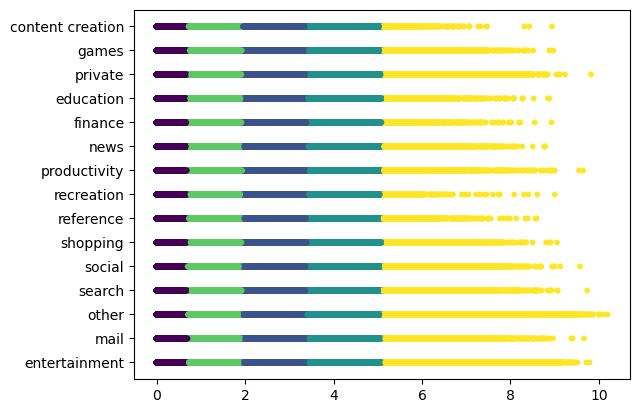

In [91]:
import matplotlib.pyplot as plt

plt.scatter(agg_parent_only["log_duration"], agg_parent_only["parent_category"], c=agg_parent_only["cluster"], cmap="viridis", s=10)
plt.scatter(*kmeans.cluster_centers_.T, c='red', marker='x')  # plot centers
plt.title("MiniBatchKMeans Clustering")
plt.show()

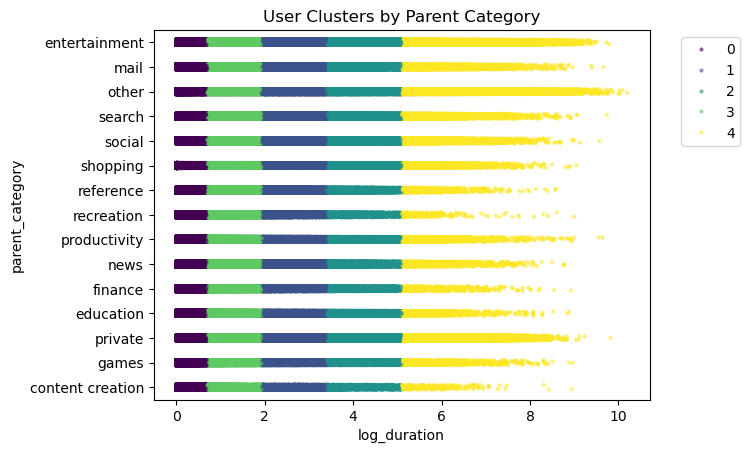

In [92]:
import seaborn as sns

sns.stripplot(
    data=agg_parent_only,
    x="log_duration",
    y="parent_category",
    hue="cluster",
    palette="viridis",
    size=3,
    jitter=True,
    alpha=0.6
)
plt.title("User Clusters by Parent Category")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [96]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans

# Assume your data is in 'df'
# Columns: 'guid', 'parent_category', 'sub_category', 'avg_duration', 'log_duration'
parent_subcat_aggregated['log_duration'] = np.log1p(parent_subcat_aggregated['avg_duration_hour'])

# 1. One-hot encode categorical features
parent_dummies = pd.get_dummies(parent_subcat_aggregated['parent_category'], prefix='parent')
sub_dummies = pd.get_dummies(parent_subcat_aggregated['sub_category'], prefix='sub')

# 2. Combine encoded features with log_duration numeric feature
X = pd.concat([parent_dummies, sub_dummies, parent_subcat_aggregated[['log_duration']]], axis=1)

# 3. Fit MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=5, batch_size=10000, random_state=42)
kmeans.fit(X)

# 4. Assign cluster labels back to original dataframe
parent_subcat_aggregated['cluster'] = kmeans.labels_

# # 5. Optional: inspect cluster centers (centroids)
# print("Cluster centers:")
# print(kmeans.cluster_centers_)

# 6. Optional: look at cluster summary stats
print(parent_subcat_aggregated.groupby('cluster').mean(numeric_only=True))


         avg_duration_hour  log_duration
cluster                                 
0                 0.370816      0.257866
1               217.504907      4.686436
2                 0.472491      0.305000
3                 0.568495      0.342662
4                 9.593475      2.168916


In [107]:
print(parent_subcat_aggregated.groupby(['cluster', 'parent_category']).mean(numeric_only=True).sort_values(by='log_duration', ascending=False))

                          avg_duration_hour  log_duration  parent_cat_encoded  \
cluster parent_category                                                         
1       private                  276.983993      4.984358                 8.0   
        other                    254.851684      4.775960                 7.0   
        entertainment            242.144816      4.751285                 2.0   
        mail                     190.078924      4.604426                 5.0   
        news                     139.445987      4.432416                 6.0   
        social                   132.258066      4.403725                14.0   
        shopping                 128.620429      4.397328                13.0   
        games                    138.717323      4.390055                 4.0   
        search                   123.944024      4.369748                12.0   
        finance                  126.867723      4.339794                 3.0   
        education           

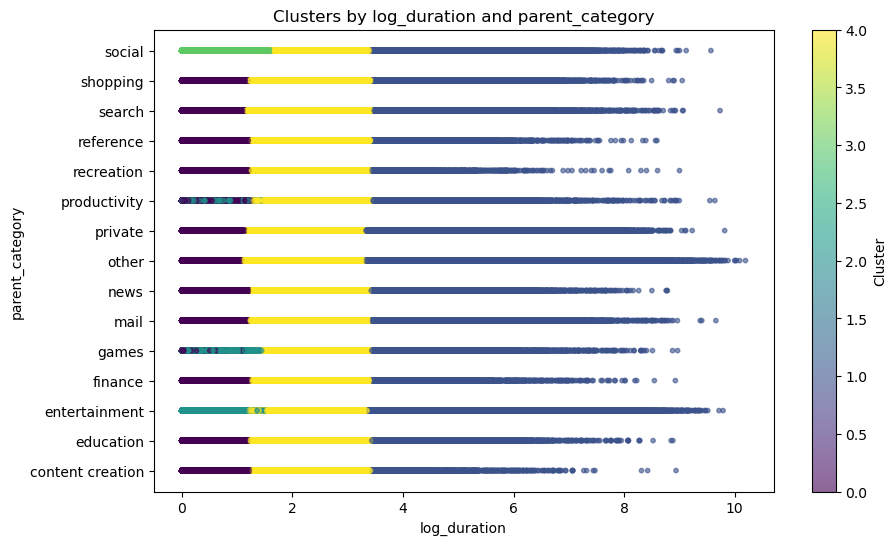

In [99]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode parent_category and sub_category for plotting
le_parent = LabelEncoder()
parent_subcat_aggregated['parent_cat_encoded'] = le_parent.fit_transform(parent_subcat_aggregated['parent_category'])

le_sub = LabelEncoder()
parent_subcat_aggregated['sub_cat_encoded'] = le_sub.fit_transform(parent_subcat_aggregated['sub_category'])

plt.figure(figsize=(10,6))
scatter = plt.scatter(
    parent_subcat_aggregated['log_duration'], 
    parent_subcat_aggregated['parent_cat_encoded'], 
    c=parent_subcat_aggregated['cluster'], 
    cmap='viridis', 
    s=10,
    alpha=0.6
)

plt.yticks(ticks=range(len(le_parent.classes_)), labels=le_parent.classes_)
plt.xlabel('log_duration')
plt.ylabel('parent_category')
plt.title('Clusters by log_duration and parent_category')
plt.colorbar(scatter, label='Cluster')
plt.show()


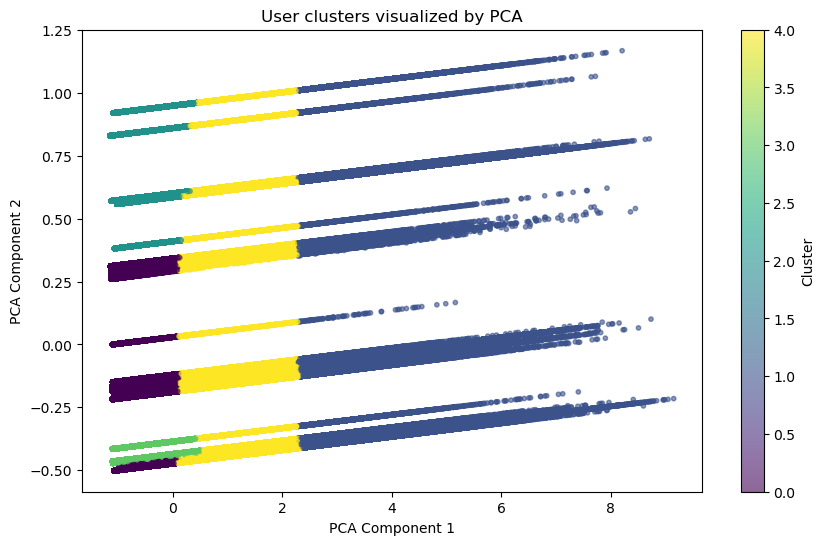

In [97]:
from sklearn.decomposition import PCA

# X is the features matrix used in clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,6))
scatter = plt.scatter(
    X_pca[:,0], X_pca[:,1], 
    c=parent_subcat_aggregated['cluster'], cmap='viridis', s=10, alpha=0.6
)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('User clusters visualized by PCA')
plt.colorbar(scatter, label='Cluster')
plt.show()


In [100]:
cluster_summary = parent_subcat_aggregated.groupby('cluster').mean(numeric_only=True)
print(cluster_summary)

         avg_duration_hour  log_duration  parent_cat_encoded  sub_cat_encoded
cluster                                                                      
0                 0.370816      0.257866            7.151059        12.837564
1               217.504907      4.686436            6.903561        15.709118
2                 0.472491      0.305000            4.547420        10.060430
3                 0.568495      0.342662           14.000000         7.267732
4                 9.593475      2.168916            7.676869        13.852556


In [102]:
for c in parent_subcat_aggregated['cluster'].unique():
    print(f"Cluster {c} top parent categories:")
    print(parent_subcat_aggregated[parent_subcat_aggregated['cluster'] == c]['parent_category'].value_counts().head())
    print()


Cluster 4 top parent categories:
parent_category
entertainment    143921
other            140011
search           122889
social            80803
productivity      76091
Name: count, dtype: int64

Cluster 0 top parent categories:
parent_category
productivity        371265
search              232373
content creation    228678
reference           197926
shopping            173307
Name: count, dtype: int64

Cluster 1 top parent categories:
parent_category
other            134971
entertainment    107809
private           85259
social            33614
search            33359
Name: count, dtype: int64

Cluster 3 top parent categories:
parent_category
social    432264
Name: count, dtype: int64

Cluster 2 top parent categories:
parent_category
entertainment    368590
productivity     229269
games            149584
Name: count, dtype: int64

